<a href="https://colab.research.google.com/github/kennyOlakunle/Tensors_Pytorch/blob/main/Basic_NN_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [49]:
#Create a model class that inherits nn.Module

class Model(nn.Module):
  #input layer (4 feautures of iris flowers)
  #Hidden layer1 (number of neurons)
  #Hidden layer2 (n) ---->
  #Output (3 classes of Iris)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #Instantiate nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [50]:
#Pick random seed for randomization
torch.manual_seed(41)

#Instance of Model
model = Model()

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [52]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

df = pd.read_csv(url)

In [53]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [54]:
#change the last column from Strings to Integer
df['variety'] = df['variety'].replace('Setosa', 0.0)
df['variety'] = df['variety'].replace('Versicolor', 0.0)
df['variety'] = df['variety'].replace('Virginica', 2.0)

df


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [55]:
#Test split stuffs

X = df.drop('variety', axis=1)

y = df['variety']

In [56]:
X = X.values
y = y.values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
X_train.size

480

In [59]:
#convert X features to float tensors

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [60]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [61]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [62]:
# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1136658191680908
Epoch: 10 and loss: 0.7476933002471924
Epoch: 20 and loss: 0.6133798956871033
Epoch: 30 and loss: 0.5634123086929321
Epoch: 40 and loss: 0.47553715109825134
Epoch: 50 and loss: 0.3490649163722992
Epoch: 60 and loss: 0.24470143020153046
Epoch: 70 and loss: 0.17004330456256866
Epoch: 80 and loss: 0.12033896893262863
Epoch: 90 and loss: 0.09194768965244293


Text(0.5, 0, 'Epoch')

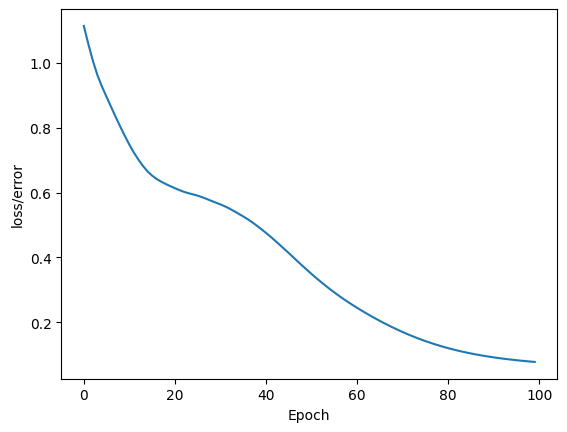

In [63]:

# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [64]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error


In [65]:
loss

tensor(0.0669)

In [66]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([ 5.0146, -4.9490,  2.2511]) 	 0 	 0
2.)  tensor([ 9.2263, -3.9823, -5.1454]) 	 0 	 0
3.)  tensor([ 1.6037, -7.0336, 10.1555]) 	 2 	 2
4.)  tensor([ 4.7767, -5.0784,  2.7747]) 	 0 	 0
5.)  tensor([ 5.3481, -5.3888,  2.5832]) 	 0 	 0
6.)  tensor([ 8.7327, -3.7978, -4.7937]) 	 0 	 0
7.)  tensor([ 5.9395, -4.5009,  0.3085]) 	 0 	 0
8.)  tensor([ 3.8206, -6.2059,  5.9227]) 	 2 	 2
9.)  tensor([ 4.1875, -5.1105,  3.5769]) 	 0 	 0
10.)  tensor([ 5.6856, -4.5823,  0.7704]) 	 0 	 0
11.)  tensor([ 3.9904, -5.8405,  5.0802]) 	 2 	 2
12.)  tensor([ 8.0184, -3.3549, -4.6854]) 	 0 	 0
13.)  tensor([ 9.0674, -3.7867, -5.3342]) 	 0 	 0
14.)  tensor([ 8.1317, -3.4222, -4.7108]) 	 0 	 0
15.)  tensor([ 8.7515, -3.7142, -5.0119]) 	 0 	 0
16.)  tensor([ 5.1417, -5.3505,  2.7791]) 	 0 	 0
17.)  tensor([ 2.4059, -6.1950,  7.6982]) 	 2 	 2
18.)  tensor([ 5.3886, -4.4217,  0.8713]) 	 0 	 0
19.)  tensor([ 4.6541, -4.8123,  2.4734]) 	 0 	 0
20.)  tensor([ 2.3379, -6.0835,  7.5929]) 	 2 	 2
21.)  ten